<a href="https://colab.research.google.com/github/bleesy156/Marketing-Analysis/blob/First/Marketing_Data_House_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Chennai houseing sale.csv")
df.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,...,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,...,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,...,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,...,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


In [ ]:
df.shape

(7109, 22)

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df.fillna(0 , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

#*Visualization*

1. **Histogram**

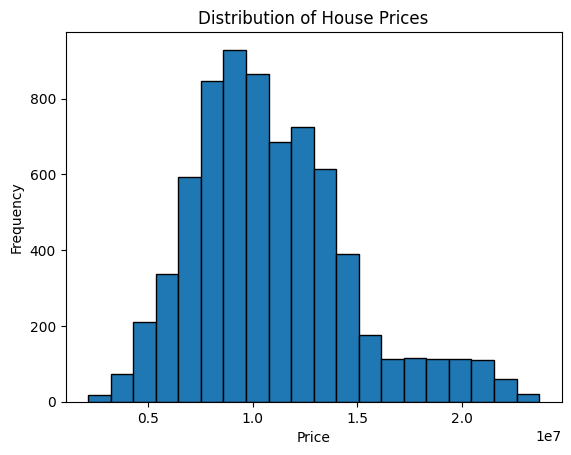

In [ ]:
plt.hist(df['SALES_PRICE'], bins=20, edgecolor='black')

plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

2. **Box Plot**

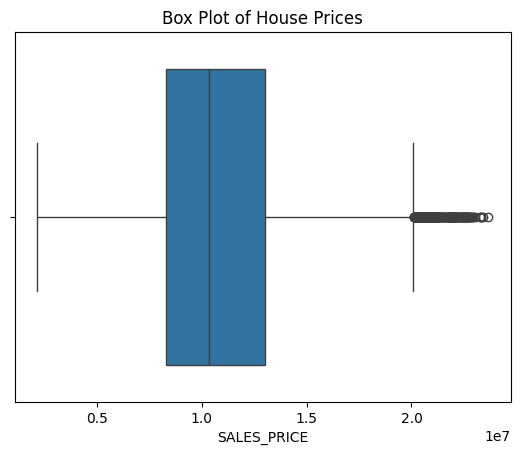

In [ ]:
sns.boxplot(x='SALES_PRICE', data=df)
plt.title('Box Plot of House Prices')
plt.show()

3. **Scatter Plot**

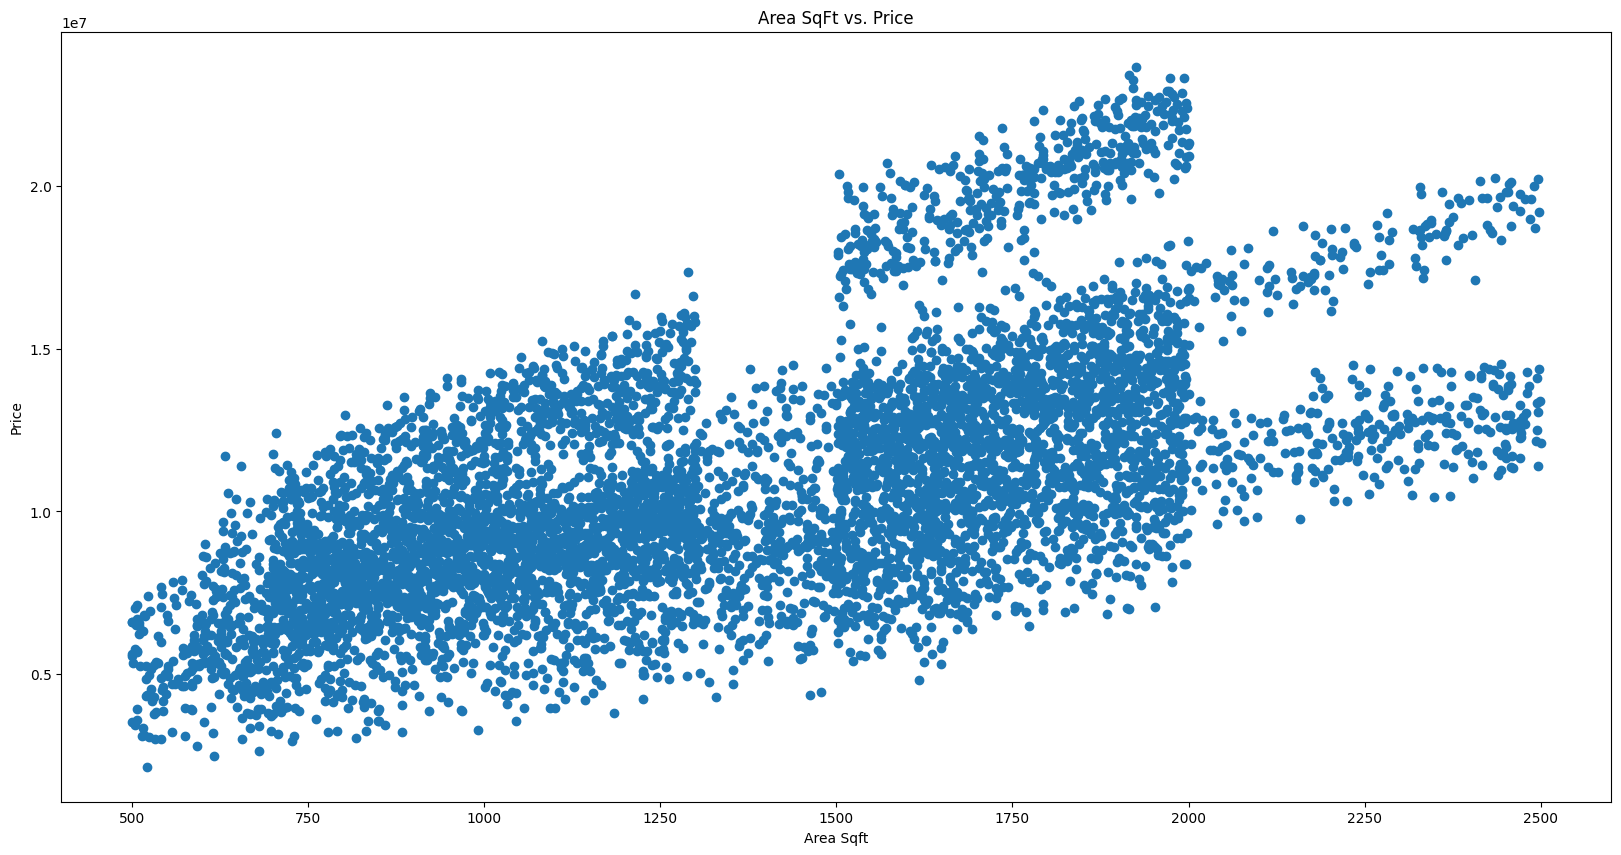

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(df['INT_SQFT'],df['SALES_PRICE'])
plt.title('Area SqFt vs. Price')
plt.xlabel('Area Sqft')
plt.ylabel('Price')
plt.show()

4. **Correlation Matrix**

5. **Pair Plot**

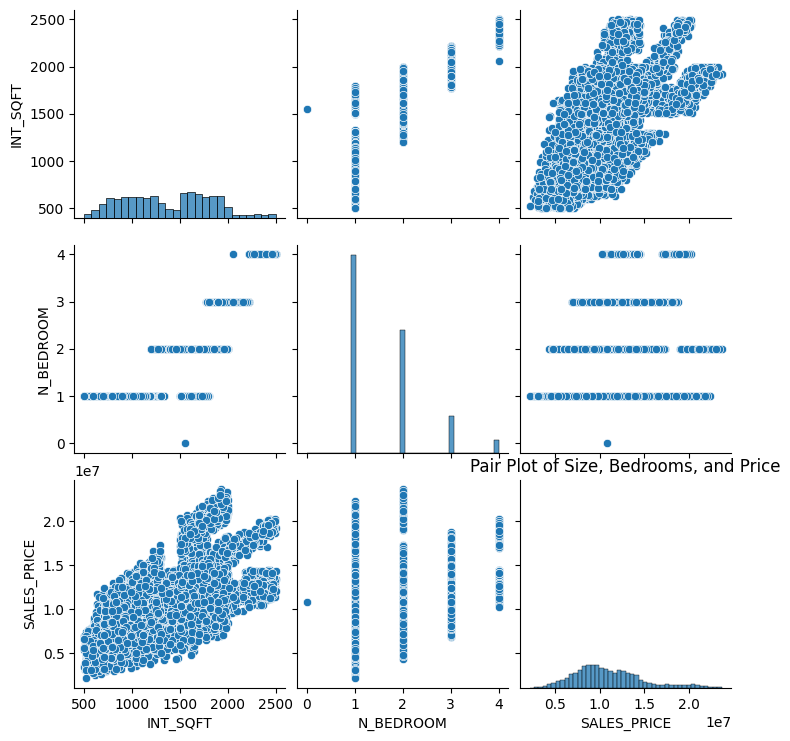

In [ ]:
sns.pairplot(df[['INT_SQFT', 'N_BEDROOM', 'SALES_PRICE']])
plt.title('Pair Plot of Size, Bedrooms, and Price')
plt.show()

6. **Count Plot**

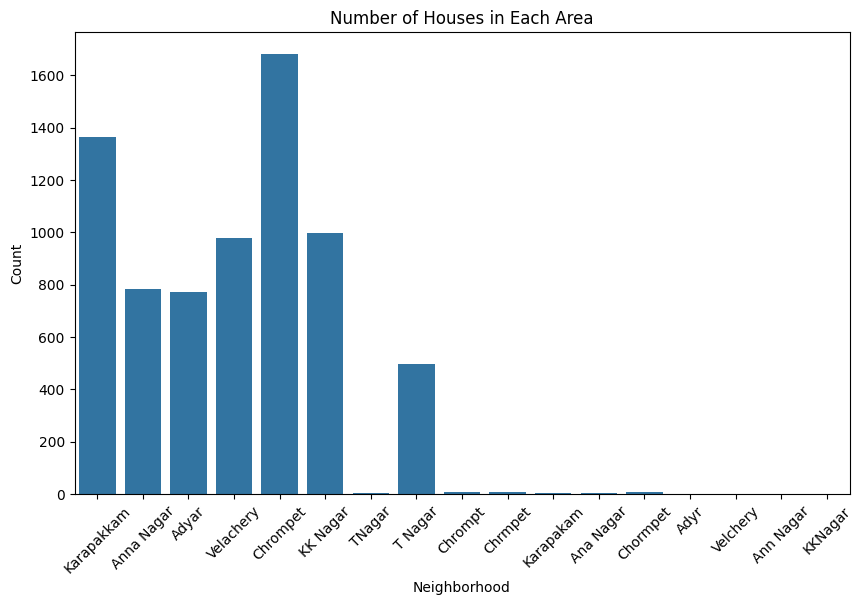

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AREA', data=df)
plt.title('Number of Houses in Each Area')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
cat_df = df[['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']]
num_df = df[['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS','SALES_PRICE','SALES_PRICE']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()


cat_df = df.select_dtypes(exclude=["int", "float"])

for i in cat_df:
        cat_df[i] = le.fit_transform(df[i])


num_df = df.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)

In [ ]:
main_df.head(5)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,...,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,...,2266,12,310,1,2,2731,1,1,4,0
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,...,6664,4,1745,1,0,4226,1,1,0,3
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,...,1270,0,288,1,2,1511,1,2,0,4
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,...,3755,15,1117,4,0,3300,4,4,4,2
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,...,4393,12,442,1,2,2406,4,1,0,1


In [ ]:
X = X = main_df.drop(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM'], axis=1)
y = main_df['SALES_PRICE']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(4976, 18)

In [ ]:
X_test.shape

(2133, 18)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

1.0

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)


array([1., 1., 1., 1., 1.])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                 'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
      }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,linear_regression,1.00000,{'fit_intercept': True}
1,lasso,1.00000,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.99998,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
y_pred=lr_clf.predict(X_test)
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)

In [ ]:
result[['PRT_ID','AREA','Price_actual','Price_pred']].sample(20)

,PRT_ID,AREA,Price_actual,Price_pred
1938,P06767,KK Nagar,16967540,16967540.0
4648,P08020,Chrompet,9103100,9103100.0
4496,P04647,KK Nagar,9771780,9771780.0
6934,P01766,KK Nagar,17134360,17134360.0
4722,P08438,Anna Nagar,12484960,12484960.0
3403,P00951,Chrompt,10651460,10651460.0
5467,P03025,Karapakkam,7032250,7032250.0
73,P02813,Adyar,7187350,7187350.0
2596,P03317,Adyar,7208905,7208905.0
2716,P04107,Karapakkam,4905000,4905000.0


In [ ]:
import pickle
with open('Chennai_houseing_sale.pickle','wb') as f:
    pickle.dump(lr_clf,f)